In [17]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import numpy as np
pd.set_option('display.max_columns', None)

from tqdm import tqdm

tqdm.pandas()

## Table 1 statistics

In [18]:
pou_outcome = pd.read_csv('pou_outcome.csv')

In [20]:
len(pou_outcome), pou_outcome['Prolonged_user'].mean(), pou_outcome['Prolonged_user'].sum()

(96974, 0.20701425124260112, 20075)

In [41]:
master_df = pd.read_csv('cohort_12-04.csv')
temp_cols = master_df.columns

len([x for x in temp_cols if x.endswith('MME') or x.endswith('nb_prescriptions') or x.endswith('is_initial') or x.endswith('nb_fills') or x.endswith('nb') or x == 'Longest_continuous_opioid_use' or x == 'opioid_naive'])

/home/ubuntu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


46

In [46]:
master_df['SURG_DT'].min(), master_df['SURG_DT'].max()

('2016-01-01', '2020-06-30')

In [53]:
master_df['year'] = master_df['SURG_DT'].apply(lambda x: x[:4])

In [54]:
len(master_df)

96974

In [55]:
feature = 'Outcome_6months'
for x in list(master_df[feature].value_counts().values):
    print('{} ({})'.format(x, round(100*x/np.sum(master_df[feature].value_counts().values), 1)))

86510 (89.2)
10464 (10.8)


In [56]:
feature = 'GENCD_RF'

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])
vals = cross_tab.values
normal_vals = vals/np.sum(vals, axis = 0)

for x in list(master_df[feature].value_counts().values)[:-1]:
    print('{} ({})'.format(x, round(100*x/np.sum(master_df[feature].value_counts().values), 1)))

print('---------')
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]-1):
        print('{} ({})'.format(vals[i,j], round(100*normal_vals[i,j], 1)))
        
    print('--------')

66859 (69.4)
29509 (30.6)
---------
60026 (89.8)
25910 (87.8)
--------
6833 (10.2)
3599 (12.2)
--------


In [57]:
p_val_chi2 = chi2_contingency(cross_tab.values)[1]

print(p_val_chi2)

9.702706183567162e-19


In [58]:
feature = 'Surgery_type'

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])
cross_tab = cross_tab[sorted(cross_tab.columns)]
vals = cross_tab.values
normal_vals = vals/np.sum(vals, axis = 0)

counts_tab = master_df[feature].value_counts().loc[sorted(cross_tab.columns)]

for x in counts_tab.index:
    print(x)
print('---------')
for x in list(counts_tab.values):
    print('{} ({})'.format(x, round(100*x/np.sum(counts_tab.values), 1)))

print('---------')
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        print('{} ({})'.format(vals[i,j], round(100*normal_vals[i,j], 1)))
        
    print('--------')

Appendectomy
CABG
ColorecResect
DistalRadFrac
ExciLysisPeriAdhesions
HysterecAbVag
InguinHerniaRepair
KneeReplacement
OophorectomyUniBi
OtherHand
PartialExcBone
SpinalFusion
TreatFracDisHipFemur
TreatFracDisLowExtremity
cholecystectomy
laminectomy
mastectomy
prostatectomy
thoracotomy
---------
7178 (7.4)
970 (1.0)
1208 (1.2)
2331 (2.4)
2037 (2.1)
12477 (12.9)
10539 (10.9)
3818 (3.9)
8497 (8.8)
460 (0.5)
4802 (5.0)
4614 (4.8)
1706 (1.8)
8338 (8.6)
19479 (20.1)
4168 (4.3)
1053 (1.1)
225 (0.2)
3074 (3.2)
---------
6787 (94.6)
865 (89.2)
1075 (89.0)
2098 (90.0)
1769 (86.8)
11289 (90.5)
9519 (90.3)
3208 (84.0)
7927 (93.3)
398 (86.5)
4236 (88.2)
3568 (77.3)
1430 (83.8)
7468 (89.6)
17864 (91.7)
3391 (81.4)
949 (90.1)
209 (92.9)
2460 (80.0)
--------
391 (5.4)
105 (10.8)
133 (11.0)
233 (10.0)
268 (13.2)
1188 (9.5)
1020 (9.7)
610 (16.0)
570 (6.7)
62 (13.5)
566 (11.8)
1046 (22.7)
276 (16.2)
870 (10.4)
1615 (8.3)
777 (18.6)
104 (9.9)
16 (7.1)
614 (20.0)
--------


In [59]:
p_val_chi2 = chi2_contingency(cross_tab.values)[1]

print(p_val_chi2)

0.0


In [60]:
feature = 'year'

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])
cross_tab = cross_tab[sorted(cross_tab.columns)]
vals = cross_tab.values
normal_vals = vals/np.sum(vals, axis = 0)

counts_tab = master_df[feature].value_counts().loc[sorted(cross_tab.columns)]

for x in counts_tab.index:
    print(x)
print('---------')
for x in list(counts_tab.values):
    print('{} ({})'.format(x, round(100*x/np.sum(counts_tab.values), 1)))

print('---------')
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        print('{} ({})'.format(vals[i,j], round(100*normal_vals[i,j], 1)))
        
    print('--------')

2016
2017
2018
2019
2020
---------
11131 (11.5)
21524 (22.2)
21674 (22.4)
28161 (29.0)
14484 (14.9)
---------
10101 (90.7)
19263 (89.5)
19271 (88.9)
25003 (88.8)
12872 (88.9)
--------
1030 (9.3)
2261 (10.5)
2403 (11.1)
3158 (11.2)
1612 (11.1)
--------


In [61]:
p_val_chi2 = chi2_contingency(cross_tab.values)[1]

print(p_val_chi2)

1.0658420841766034e-07


In [62]:
feature = 'State'

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])


counts_tab = master_df[feature].value_counts()

cross_tab = cross_tab[counts_tab.index]
vals = cross_tab.values
normal_vals = vals/np.sum(vals, axis = 0)


# for x in counts_tab.index:
#     print(x)
# print('---------')

for i in range(len(counts_tab.index)):
    print('State {}'.format(i+1))
    
print('---------')
    
for x in list(counts_tab.values):
    print('{} ({})'.format(x, round(100*x/np.sum(counts_tab.values), 1)))

print('---------')
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        print('{} ({})'.format(vals[i,j], round(100*normal_vals[i,j], 1)))
        
    print('--------')

State 1
State 2
State 3
State 4
State 5
State 6
State 7
---------
38922 (40.1)
38717 (39.9)
7980 (8.2)
4731 (4.9)
4164 (4.3)
1487 (1.5)
973 (1.0)
---------
34891 (89.6)
34552 (89.2)
6906 (86.5)
3937 (83.2)
3917 (94.1)
1411 (94.9)
896 (92.1)
--------
4031 (10.4)
4165 (10.8)
1074 (13.5)
794 (16.8)
247 (5.9)
76 (5.1)
77 (7.9)
--------


In [63]:
p_val_chi2 = chi2_contingency(cross_tab.values)[1]

print(p_val_chi2)

5.025159232470712e-84


In [31]:
feature = 'opioid_naive'

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])


counts_tab = master_df[feature].value_counts()

cross_tab = cross_tab[counts_tab.index]
vals = cross_tab.values
normal_vals = vals/np.sum(vals, axis = 0)


for x in counts_tab.index:
    print(x)
print('---------')

    
print('---------')
    
for x in list(counts_tab.values):
    print('{} ({})'.format(x, round(100*x/np.sum(counts_tab.values), 1)))

print('---------')
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        print('{} ({})'.format(vals[i,j], round(100*normal_vals[i,j], 1)))
        
    print('--------')

1
0
---------
---------
64528 (66.5)
32446 (33.5)
---------
59769 (92.6)
26741 (82.4)
--------
4759 (7.4)
5705 (17.6)
--------


In [32]:
p_val_chi2 = chi2_contingency(cross_tab.values)[1]

print(p_val_chi2)

0.0


In [15]:
a = master_df[master_df['Outcome_6months']==0]['Age'].values.reshape((-1,1))

b = master_df[master_df['Outcome_6months']==1]['Age'].values.reshape((-1,1))

print(ttest_ind(a,b, equal_var = False, nan_policy = 'omit')[1])
print('Overall: {:.2f} ({:.2f})'.format(master_df['Age'].mean(), master_df['Age'].std()))
print('No OUD: {:.2f} ({:.2f})'.format(np.nanmean(a), np.nanstd(a)))
print('OUD: {:.2f} ({:.2f})'.format(np.nanmean(b), np.nanstd(b)))


2.3261716599485443e-221
Overall: 40.47 (13.53)
No OUD: 40.04 (13.70)
OUD: 43.98 (11.50)


## Statistics on outcomes

In [71]:
100*master_df.Outcome_3months.value_counts(normalize = True)

False    91.746241
True      8.253759
Name: Outcome_3months, dtype: float64

In [72]:
100*master_df.Outcome_6months.value_counts(normalize = True)

False    89.209479
True     10.790521
Name: Outcome_6months, dtype: float64

In [73]:
100*master_df.Outcome_12months.value_counts(normalize = True)

False    85.835379
True     14.164621
Name: Outcome_12months, dtype: float64

In [14]:
100*master_df.Outcome_Abuse_3months.value_counts(normalize = True)

0    91.710051
1     8.289949
Name: Outcome_Abuse_3months, dtype: float64

In [7]:
100*master_df.Outcome_Abuse_6months.value_counts(normalize = True)

0    89.669396
1    10.330604
Name: Outcome_Abuse_6months, dtype: float64

In [75]:
100*master_df.Outcome_Abuse_12months.value_counts(normalize = True)

0    86.380886
1    13.619114
Name: Outcome_Abuse_12months, dtype: float64

In [76]:
100*master_df.Outcome_Overdose_3months.value_counts(normalize = True)

0    99.309093
1     0.690907
Name: Outcome_Overdose_3months, dtype: float64

In [9]:
100*master_df.Outcome_Overdose_6months.value_counts(normalize = True)

0    99.063667
1     0.936333
Name: Outcome_Overdose_6months, dtype: float64

In [78]:
100*master_df.Outcome_Overdose_12months.value_counts(normalize = True)

0    98.590344
1     1.409656
Name: Outcome_Overdose_12months, dtype: float64

## Statistical tests on obesity, depression and diabetes

In [4]:
obesity_codes = ['END009']
diabetes_codes = ['PRG019'] + ['END00{}'.format(i) for i in range(2,7)]
depression_codes = ['MBD002']

In [5]:
master_df['obesity'] = (master_df[['Diag_'+c for c in obesity_codes]].sum(axis = 1) > 0).astype(int)
master_df['diabetes'] = (master_df[['Diag_'+c for c in diabetes_codes]].sum(axis = 1) > 0).astype(int)
master_df['depression'] = (master_df[['Diag_'+c for c in depression_codes]].sum(axis = 1) > 0).astype(int)

In [5]:
feature = 'obesity'

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])


counts_tab = master_df[feature].value_counts()

cross_tab = cross_tab[counts_tab.index]
vals = cross_tab.values
normal_vals = vals/np.sum(vals, axis = 0)

    
print('---------')
    
for x in list(counts_tab.values[1:]):
    print('{} ({})'.format(x, round(100*x/np.sum(counts_tab.values), 1)))

print('---------')
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        print('{} ({})'.format(vals[i,j], round(100*normal_vals[i,j], 1)))
        
    print('--------')


---------
28422 (29.3)
---------
61254 (89.4)
25256 (88.9)
--------
7298 (10.6)
3166 (11.1)
--------


In [6]:
feature = 'depression'

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])


counts_tab = master_df[feature].value_counts()

cross_tab = cross_tab[counts_tab.index]
vals = cross_tab.values
normal_vals = vals/np.sum(vals, axis = 0)

    
print('---------')
    
for x in list(counts_tab.values[1:]):
    print('{} ({})'.format(x, round(100*x/np.sum(counts_tab.values), 1)))

print('---------')
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        print('{} ({})'.format(vals[i,j], round(100*normal_vals[i,j], 1)))
        
    print('--------')

---------
22766 (23.5)
---------
67724 (91.3)
18786 (82.5)
--------
6484 (8.7)
3980 (17.5)
--------


In [8]:
feature = 'diabetes'

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])


counts_tab = master_df[feature].value_counts()

cross_tab = cross_tab[counts_tab.index]
vals = cross_tab.values
normal_vals = vals/np.sum(vals, axis = 0)

    
print('---------')
    
for x in list(counts_tab.values[1:]):
    print('{} ({})'.format(x, round(100*x/np.sum(counts_tab.values), 1)))

print('---------')
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        print('{} ({})'.format(vals[i,j], round(100*normal_vals[i,j], 1)))
        
    print('--------')

---------
14755 (15.2)
---------
73681 (89.6)
12829 (86.9)
--------
8538 (10.4)
1926 (13.1)
--------


In [24]:
feature = 'diabetes'
cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature], normalize = 'index')
cross_tab

diabetes,0,1
Outcome_6months,,
False,0.851705,0.148295
True,0.815940,0.184060


In [25]:
feature = 'depression'
cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature], normalize = 'index')
cross_tab

depression,0,1
Outcome_6months,,
False,0.782846,0.217154
True,0.619648,0.380352


In [26]:
feature = 'obesity'
cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature], normalize = 'index')
cross_tab

obesity,0,1
Outcome_6months,,
False,0.708057,0.291943
True,0.697439,0.302561


In [27]:
# Now, let's do some statistical tests

from scipy.stats import pearsonr, fisher_exact, kruskal

feature = 'obesity'

### Chi-square

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])
p_val_chi2 = chi2_contingency(cross_tab.values)[1]

print(p_val_chi2)


### Pearson correlation (aka Spearman here since we have bernoulli variables)

pearson_corr, pearson_pval = pearsonr(master_df['Outcome_6months'], master_df[feature])

print(pearson_corr, pearson_pval)


### Fisher's exact test

fisher_corr, fisher_pval = fisher_exact(cross_tab)

print(fisher_corr, fisher_pval)

### Kruskal Wallis

kru = kruskal(master_df[master_df[feature] == 1].Outcome_6months, master_df[master_df[feature] == 0].Outcome_6months)

kruskal_stat, kruskal_pval = kru.statistic, kru.pvalue

print(kruskal_stat, kruskal_pval)

0.024933202146094433
0.007237502979036814 0.024208385342149846
1.0521482491200222 0.024381600130089682
5.079586289860136 0.024209145877740337


In [28]:
# Now, let's do some statistical tests

from scipy.stats import pearsonr, fisher_exact, kruskal

feature = 'diabetes'

### Chi-square

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])
p_val_chi2 = chi2_contingency(cross_tab.values)[1]

print(p_val_chi2)


### Pearson correlation (aka Spearman here since we have bernoulli variables)

pearson_corr, pearson_pval = pearsonr(master_df['Outcome_6months'], master_df[feature])

print(pearson_corr, pearson_pval)


### Fisher's exact test

fisher_corr, fisher_pval = fisher_exact(cross_tab)

print(fisher_corr, fisher_pval)

### Kruskal Wallis

kru = kruskal(master_df[master_df[feature] == 1].Outcome_6months, master_df[master_df[feature] == 0].Outcome_6months)

kruskal_stat, kruskal_pval = kru.statistic, kru.pvalue

print(kruskal_stat, kruskal_pval)

7.5190575232521885e-22
0.030894427786091666 6.400204801161458e-22
1.2955758340684018 5.227240896514829e-21
92.5573992452167 6.540017456324451e-22


In [29]:
# Now, let's do some statistical tests

from scipy.stats import pearsonr, fisher_exact, kruskal

feature = 'depression'

### Chi-square

cross_tab = pd.crosstab(master_df['Outcome_6months'], master_df[feature])
p_val_chi2 = chi2_contingency(cross_tab.values)[1]

print(p_val_chi2)


### Pearson correlation (aka Spearman here since we have bernoulli variables)

pearson_corr, pearson_pval = pearsonr(master_df['Outcome_6months'], master_df[feature])

print(pearson_corr, pearson_pval)


### Fisher's exact test

fisher_corr, fisher_pval = fisher_exact(cross_tab)

print(fisher_corr, fisher_pval)

### Kruskal Wallis

kru = kruskal(master_df[master_df[feature] == 1].Outcome_6months, master_df[master_df[feature] == 0].Outcome_6months)

kruskal_stat, kruskal_pval = kru.statistic, kru.pvalue

print(kruskal_stat, kruskal_pval)

1.0354420196492176e-302
0.11946124830400845 4.561125161821755e-305
2.2128315197641832 4.736533035195821e-275
1383.9006983705265 6.619968773102608e-303


## Graphs MME, outcomes for vulnerable populations

In [6]:
import matplotlib.pyplot as plt

In [7]:
pou_outcome = pd.read_csv('pou_outcome.csv')
master_df = master_df.merge(pou_outcome, on = 'MA_NUM')
master_df['year'] = master_df['SURG_DT'].apply(lambda x: x[:4])

In [8]:
res = {}

for feature in ['depression', 'diabetes', 'obesity', 'all']:
    if feature == 'all':
        temp = master_df
        temp = master_df[(master_df['depression'] == 0) & (master_df['diabetes'] == 0) & (master_df['obesity'] == 0)]
    else:
        temp = master_df[master_df[feature] == 1]
        
    temp_MME = temp[temp.MME_initial != 0]
    MMEs = temp_MME.groupby('year').MME_initial.mean()
    OUDs = temp.groupby('year')['Outcome_6months'].mean()
    POUs = temp.groupby('year')['Prolonged_user'].mean()
    
    res[feature] = [MMEs.values, OUDs.values, POUs.values]


In [9]:
new_res = {}

for feature in ['depression', 'diabetes', 'obesity', 'all']:
    for i,x in enumerate(['_MME', '_OUD', '_POU']):
        new_res[feature+x] = res[feature][i]
        if i > 0:
            new_res[feature+x] = 100*new_res[feature+x]
            

In [10]:
new_res = pd.DataFrame(new_res, index = ['2016', '2017', '2018', '2019', '2020'])
new_res.to_csv('MME_outcomes_vulnerable_populations.csv')

In [12]:
labels = ['Depression', 'Diabetes', 'Obesity', 'Control']
years = ['2016', '2017', '2018', '2019', '2020']

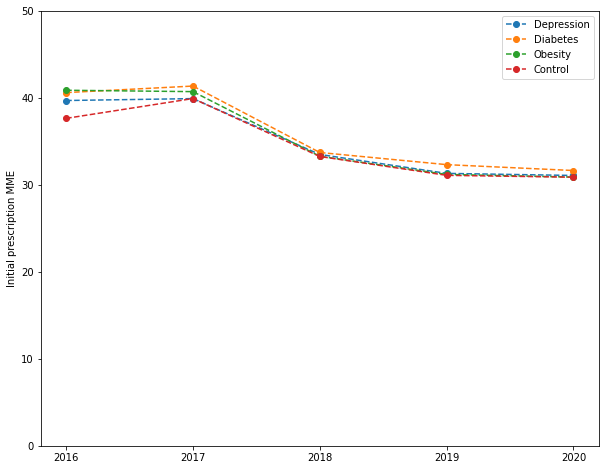

In [13]:
### MME plot

plt.figure(figsize = (10,8))

for i,feature in enumerate(['depression', 'diabetes', 'obesity', 'all']):
    
    plt.plot(range(5), res[feature][0], linestyle = '--', marker = 'o', label = labels[i])
    plt.xticks(range(5),years)
    

plt.ylabel('Initial prescription MME')
plt.ylim(0,50)
plt.legend(loc = 'best')
plt.savefig('mme_initial.svg')

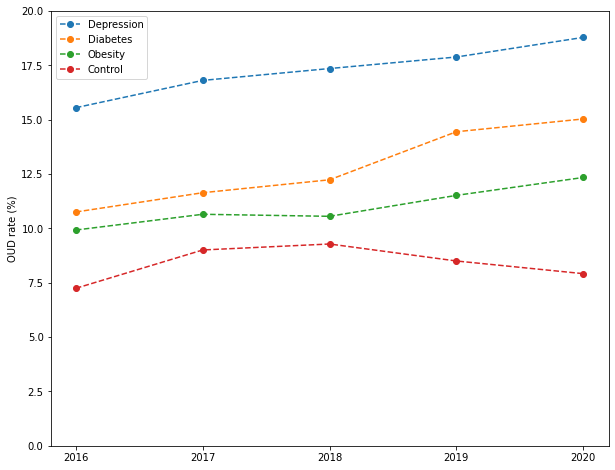

In [14]:
### OUD plot

plt.figure(figsize = (10,8))

for i,feature in enumerate(['depression', 'diabetes', 'obesity', 'all']):
    
    plt.plot(range(5), 100*res[feature][1], linestyle = '--', marker = 'o', label = labels[i])
    plt.xticks(range(5),years)
    

plt.ylabel('OUD rate (%)')
plt.ylim(0,20)
plt.legend(loc = 'best')
plt.savefig('oud_rate.svg')

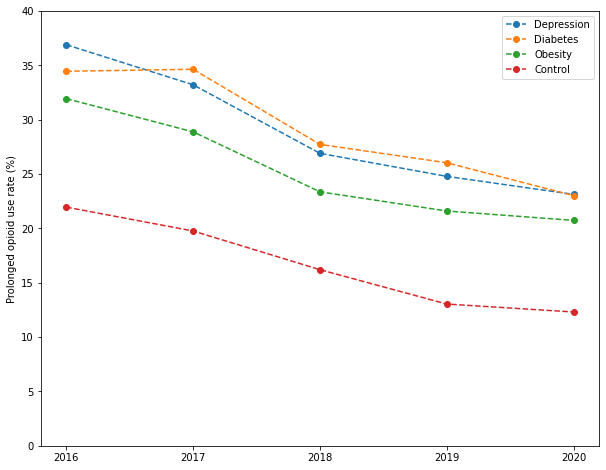

In [16]:
### OUD plot

plt.figure(figsize = (10,8))

for i,feature in enumerate(['depression', 'diabetes', 'obesity', 'all']):
    
    plt.plot(range(5), 100*res[feature][2], linestyle = '--', marker = 'o', label = labels[i])
    plt.xticks(range(5),years)
    

plt.ylabel('Prolonged opioid use rate (%)')
plt.ylim(0,40)
plt.legend(loc = 'best')
plt.savefig('prolonged_use_rate.svg')